In [1]:
!wget --no-check-certificate \
    https://ceb.nlm.nih.gov/proj/malaria/cell_images.zip \
    -O /tmp/cell_image.zip

--2019-07-12 09:15:52--  https://ceb.nlm.nih.gov/proj/malaria/cell_images.zip
Resolving ceb.nlm.nih.gov (ceb.nlm.nih.gov)... 130.14.52.15, 2607:f220:41e:7052::15
Connecting to ceb.nlm.nih.gov (ceb.nlm.nih.gov)|130.14.52.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 353452851 (337M) [application/zip]
Saving to: ‘/tmp/cell_image.zip’

/tmp/cell_image.zip 100%[===================>] 337.08M  20.3MB/s    in 16s     

2019-07-12 09:16:10 (20.4 MB/s) - ‘/tmp/cell_image.zip’ saved [353452851/353452851]



In [2]:
!wget --no-check-certificate \
    https://ceb.nlm.nih.gov/proj/malaria/malaria_cell_classification_code.zip \
    -O /tmp/malaria_cell_classification_code.zip

--2019-07-12 09:16:22--  https://ceb.nlm.nih.gov/proj/malaria/malaria_cell_classification_code.zip
Resolving ceb.nlm.nih.gov (ceb.nlm.nih.gov)... 130.14.52.15, 2607:f220:41e:7052::15
Connecting to ceb.nlm.nih.gov (ceb.nlm.nih.gov)|130.14.52.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12581 (12K) [application/zip]
Saving to: ‘/tmp/malaria_cell_classification_code.zip’

/tmp/malaria_cell_c 100%[===================>]  12.29K  --.-KB/s    in 0s      

2019-07-12 09:16:23 (181 MB/s) - ‘/tmp/malaria_cell_classification_code.zip’ saved [12581/12581]



In [0]:
import os
import zipfile

local_zip = '/tmp/cell_image.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/cell_image')
local_zip = '/tmp/malaria_cell_classification_code.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/malaria_cell_classification_code')
zip_ref.close()

In [0]:
import os
#Directory with our training data
train_parasitized_dir = os.path.join('/tmp/cell_image/cell_images/Parasitized')

In [0]:
train_uninfected_dir = os.path.join('/tmp/cell_image/cell_images/Uninfected')

In [18]:
train_parasitized_names = os.listdir(train_parasitized_dir)
print(train_parasitized_names[:10])

train_uninfected_names = os.listdir(train_uninfected_dir)
print(train_uninfected_names[:10])

['C67P28N_ThinF_IMG_20150819_132441_cell_175.png', 'C181P142ThinF_IMG_20151127_160650_cell_171.png', 'C118P79ThinF_IMG_20151002_110609_cell_3.png', 'C84P45ThinF_IMG_20150818_102507_cell_90.png', 'C70P31_ThinF_IMG_20150819_141730_cell_104.png', 'C39P4thinF_original_IMG_20150622_111326_cell_15.png', 'C107P68ThinF_IMG_20150924_222535_cell_143.png', 'C180P141NThinF_IMG_20151201_165423_cell_178.png', 'C59P20thinF_IMG_20150803_113051_cell_179.png', 'C60P21thinF_IMG_20150804_105639_cell_2.png']
['C102P63ThinF_IMG_20150918_161826_cell_152.png', 'C186P147NThinF_IMG_20151203_150859_cell_51.png', 'C113P74ThinF_IMG_20150930_134429_cell_114.png', 'C103P64ThinF_IMG_20150918_164331_cell_72.png', 'C225ThinF_IMG_20151112_113735_cell_249.png', 'C74P35_ThinF_IMG_20150815_114555_cell_89.png', 'C78P39ThinF_IMG_20150606_104936_cell_9.png', 'C205ThinF_IMG_20151106_152003_cell_188.png', 'C237ThinF_IMG_20151127_104748_cell_67.png', 'C146P107ThinF_IMG_20151018_134554_cell_49.png']


In [19]:
print('total training Parasitized images:', len(os.listdir(train_parasitized_dir)))
print('total training Uninfected images:', len(os.listdir(train_uninfected_dir)))

total training Parasitized images: 13780
total training Uninfected images: 13780


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

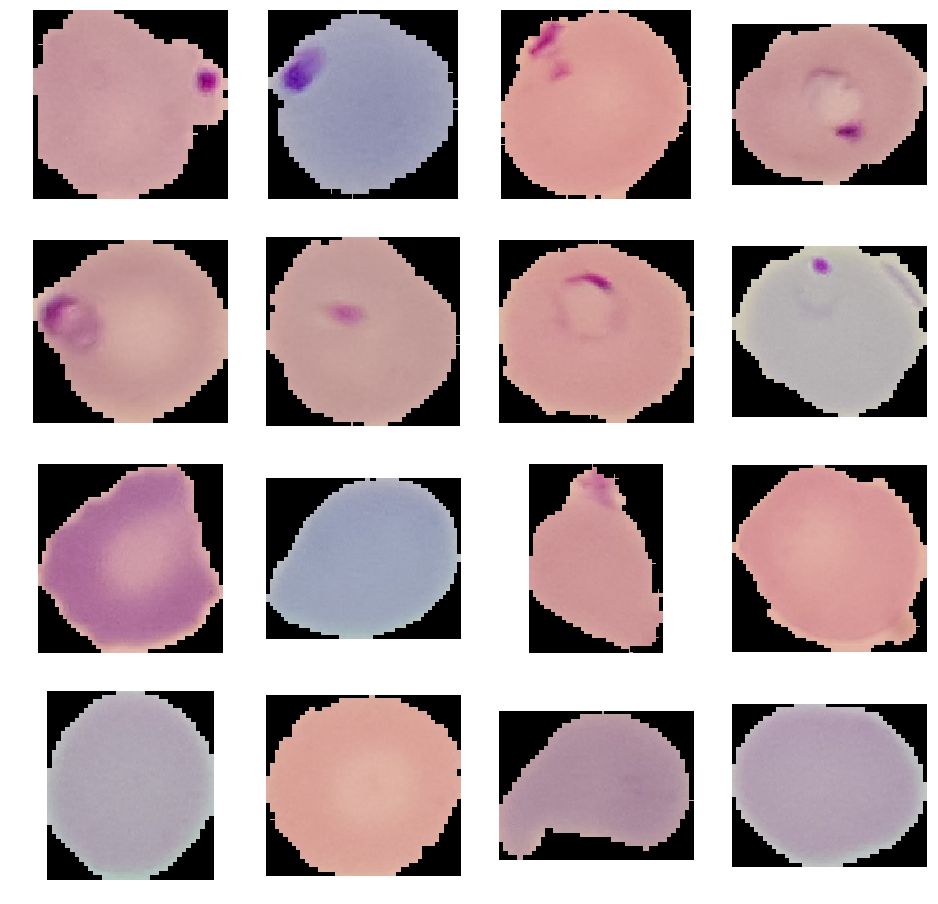

In [21]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_parasitized_pix = [os.path.join(train_parasitized_dir, fname) 
                for fname in train_parasitized_names[pic_index-8:pic_index]]
next_uninfected_pix = [os.path.join(train_uninfected_dir, fname) 
                for fname in train_uninfected_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_parasitized_pix+next_uninfected_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [0]:
import tensorflow as tf

In [23]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron
    tf.keras.layers.Dense(1, activation='sigmoid')
])

W0712 09:22:20.520513 140658288097152 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [25]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

W0712 09:22:30.967968 140658288097152 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(validation_split=0.2,rescale=1/255)

In [27]:
train_generator = train_datagen.flow_from_directory(
        '/tmp/cell_image/cell_images/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary',
        subset='training')
train_generator = train_datagen.flow_from_directory(
        '/tmp/cell_image/cell_images/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary',
        subset='validation')

Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


In [28]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 9s 1s/step - loss: 0.8508 - acc: 0.4893
Epoch 2/15
8/8 [==============================] - 2s 209ms/step - loss: 0.6937 - acc: 0.5010
Epoch 3/15
8/8 [==============================] - 2s 205ms/step - loss: 0.6980 - acc: 0.5303
Epoch 4/15
8/8 [==============================] - 2s 214ms/step - loss: 0.6901 - acc: 0.5166
Epoch 5/15
8/8 [==============================] - 2s 271ms/step - loss: 0.6945 - acc: 0.4945
Epoch 6/15
8/8 [==============================] - 2s 281ms/step - loss: 0.6933 - acc: 0.5107
Epoch 7/15
8/8 [==============================] - 2s 290ms/step - loss: 0.6933 - acc: 0.5225
Epoch 8/15
8/8 [==============================] - 2s 289ms/step - loss: 0.6841 - acc: 0.5771
Epoch 9/15
8/8 [==============================] - 2s 252ms/step - loss: 0.7137 - acc: 0.5089
Epoch 10/15
8/8 [==============================] - 2s 288ms/step - loss: 0.9132 - acc: 0.6260
Epoch 11/15
8/8 [==============================] - 2s 281ms/step - loss:

In [29]:
history.history

{'acc': [0.4892578,
  0.50097656,
  0.53027344,
  0.51660156,
  0.49445677,
  0.5107422,
  0.52246094,
  0.57714844,
  0.5088692,
  0.62597656,
  0.70703125,
  0.82372504,
  0.8857422,
  0.9121094,
  0.93066406],
 'loss': [0.8507560789585114,
  0.6937184557318687,
  0.6979857310652733,
  0.6901132985949516,
  0.6935594194215575,
  0.6932749673724174,
  0.6933308988809586,
  0.6840907037258148,
  0.7185633746853425,
  0.9131510332226753,
  0.606020100414753,
  0.5180965782269141,
  0.3511955924332142,
  0.26370445266366005,
  0.21217630989849567]}

In [31]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a Uninfected")
  else:
    print(fn + " is a Paracitizied")

Saving C33P1thinF_IMG_20150619_115740a_cell_162.png to C33P1thinF_IMG_20150619_115740a_cell_162.png
[0.]
C33P1thinF_IMG_20150619_115740a_cell_162.png is a Paracitizied
